In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import find_peaks

In [2]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/XRD/August2024/'


Load datafiles for MAPbBr3 crystals

In [3]:
file_path_csSC67_B = os.path.join(base_path,'SC67_B/SC67-B_t2t.csv')
file_path_csSC67_A = os.path.join(base_path,'SC67_A/SC67-A_t2t.csv')


df_SC67_B = pd.read_csv(file_path_csSC67_B, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_B.head()

df_SC67_A = pd.read_csv(file_path_csSC67_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_A.head()


,2theta,counts
0,7.00,0.000000
1,7.01,0.000000
2,7.02,3.193791
3,7.03,0.000000
4,7.04,0.000000


Load files from CSPbBR3 crystals

In [4]:
file_path_CS104_A = os.path.join(base_path,'CS104_A/CS104-A_t2t.csv')
file_path_CS106_A = os.path.join(base_path,'CS106_A/CS106-A_t2t.csv')


df_CS104_A = pd.read_csv(file_path_CS104_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS104_A.head()

df_CS106_A = pd.read_csv(file_path_CS106_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS106_A.head()


,2theta,counts
0,7.00,0.0
1,7.01,0.0
2,7.02,0.0
3,7.03,0.0
4,7.04,0.0


function to draw the bare XRD plot 

In [5]:
def plotXRD(dfA, dfB, crystaltype, labelA, labelB, cA, cB):
    fig = plt.figure(figsize=(35,20))
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
    ax1.tick_params(axis='x', labelsize=30)
    ax1.set_ylabel("counts", fontsize=30)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.set_title(crystaltype, fontsize=40)
    ax1.set_yscale('log')
    #ax1.grid(True)
    ax1.plot(dfB['2theta'], dfB['counts'], label=labelA, c=cA, linewidth=3)
    ax1.plot(dfA['2theta'], dfA['counts'], label=labelB, c=cB, linewidth=2)
    ax1.set_xlim(8, 140)
    ax1.legend(fontsize="30", frameon=False)

    #plt.show()
    return ax1

In [6]:
def myfindpeak(df):
    _df = df
    peaks, _ = find_peaks(_df['counts'], threshold=65, prominence=[60]) 
    peaks_x = _df['2theta'].iloc[peaks]
    peaks_y = _df['counts'].iloc[peaks]
    num_peaks = len(peaks_SC67_B)

    return peaks, peaks_x, peaks_y, num_peaks

In [7]:
def printpeaks(df, peaks, crystal):
    peaks_x = df['2theta'].iloc[peaks]
    peaks_y = df['counts'].iloc[peaks]
    n_peaks = len(peaks)
    
    #print what has been found: 
    print('\n\n -----', crystal, ' ---- ')

    print('num of peaks found', n_peaks)
    print('peaks are:' )

    for x, y in zip(peaks_x, peaks_y):
        print('x ', x , ';  y ', y )

In [18]:
peaks_SC67_B, _ = find_peaks(df_SC67_B['counts'], height=65, prominence=[60]) 
printpeaks(df_SC67_B, peaks_SC67_B, 'SC67-B')

peaks_SC67_A, _ = find_peaks(df_SC67_A['counts'], height=65, prominence=[60]) 
printpeaks(df_SC67_A, peaks_SC67_A, 'SC67-A')



 ----- SC67-B  ---- 
num of peaks found 8
peaks are:
x  14.9399995803833 ;  y  1387836.66666667
x  29.9699993133545 ;  y  286.820449829102
x  30.1200008392334 ;  y  3445042.91666667
x  45.8800010681152 ;  y  1022042.91666667
x  62.6199989318848 ;  y  442385.9375
x  81.0199966430664 ;  y  12523.7841796875
x  102.419998168945 ;  y  9293.18115234375
x  130.830001831055 ;  y  562.100779215495


 ----- SC67-A  ---- 
num of peaks found 10
peaks are:
x  14.8999996185303 ;  y  437216.770833333
x  30.0 ;  y  11406.220703125
x  30.0499992370605 ;  y  881490.104166667
x  45.6699981689453 ;  y  505.086924235026
x  45.7599983215332 ;  y  190071.9921875
x  62.3300018310547 ;  y  262.116877237956
x  62.4500007629395 ;  y  116384.049479167
x  80.7799987792969 ;  y  6020.42846679688
x  102.080001831055 ;  y  5341.95393880208
x  130.240005493164 ;  y  254.950866699219


In [16]:
#peaks_CS104_A, _ = find_peaks(df_CS104_A['counts'], threshold=40, prominence=[20]) 
peaks_CS104_A, _ = find_peaks(df_CS104_A['counts'], height=70, prominence=[40]) 
printpeaks(df_CS104_A, peaks_CS104_A, 'CS104-A')

#peaks_CS106_A, _ = find_peaks(df_CS106_A['counts'], threshold=40, prominence=[20]) 
peaks_CS106_A, _ = find_peaks(df_CS106_A['counts'], height=70, prominence=[40]) 
printpeaks(df_CS106_A, peaks_CS106_A, 'CS106-A')



 ----- CS104-A  ---- 
num of peaks found 10
peaks are:
x  15.0600004196167 ;  y  1913.65030924479
x  15.2200002670288 ;  y  33691.8489583333
x  30.3799991607666 ;  y  7281.62353515625
x  30.7000007629395 ;  y  174971.888020833
x  30.8299999237061 ;  y  110.733960469564
x  46.2900009155273 ;  y  104.112644195557
x  46.7799987792969 ;  y  537.439727783203
x  63.2000007629395 ;  y  564.739125569661
x  63.9199981689453 ;  y  1969.84985351563
x  105.120002746582 ;  y  70.1023038228353


 ----- CS106-A  ---- 
num of peaks found 11
peaks are:
x  15.0600004196167 ;  y  5233.30078125
x  15.2200002670288 ;  y  6368.36222330729
x  30.3799991607666 ;  y  93695.5924479167
x  30.7000007629395 ;  y  51544.51171875
x  46.2799987792969 ;  y  937.668660481771
x  46.7900009155273 ;  y  664.322306315104
x  63.2000007629395 ;  y  4754.70865885417
x  63.9300003051758 ;  y  5347.39705403646
x  82.8600006103516 ;  y  81.1345799763997
x  103.620002746582 ;  y  434.232381184896
x  105.120002746582 ;  y  458.7

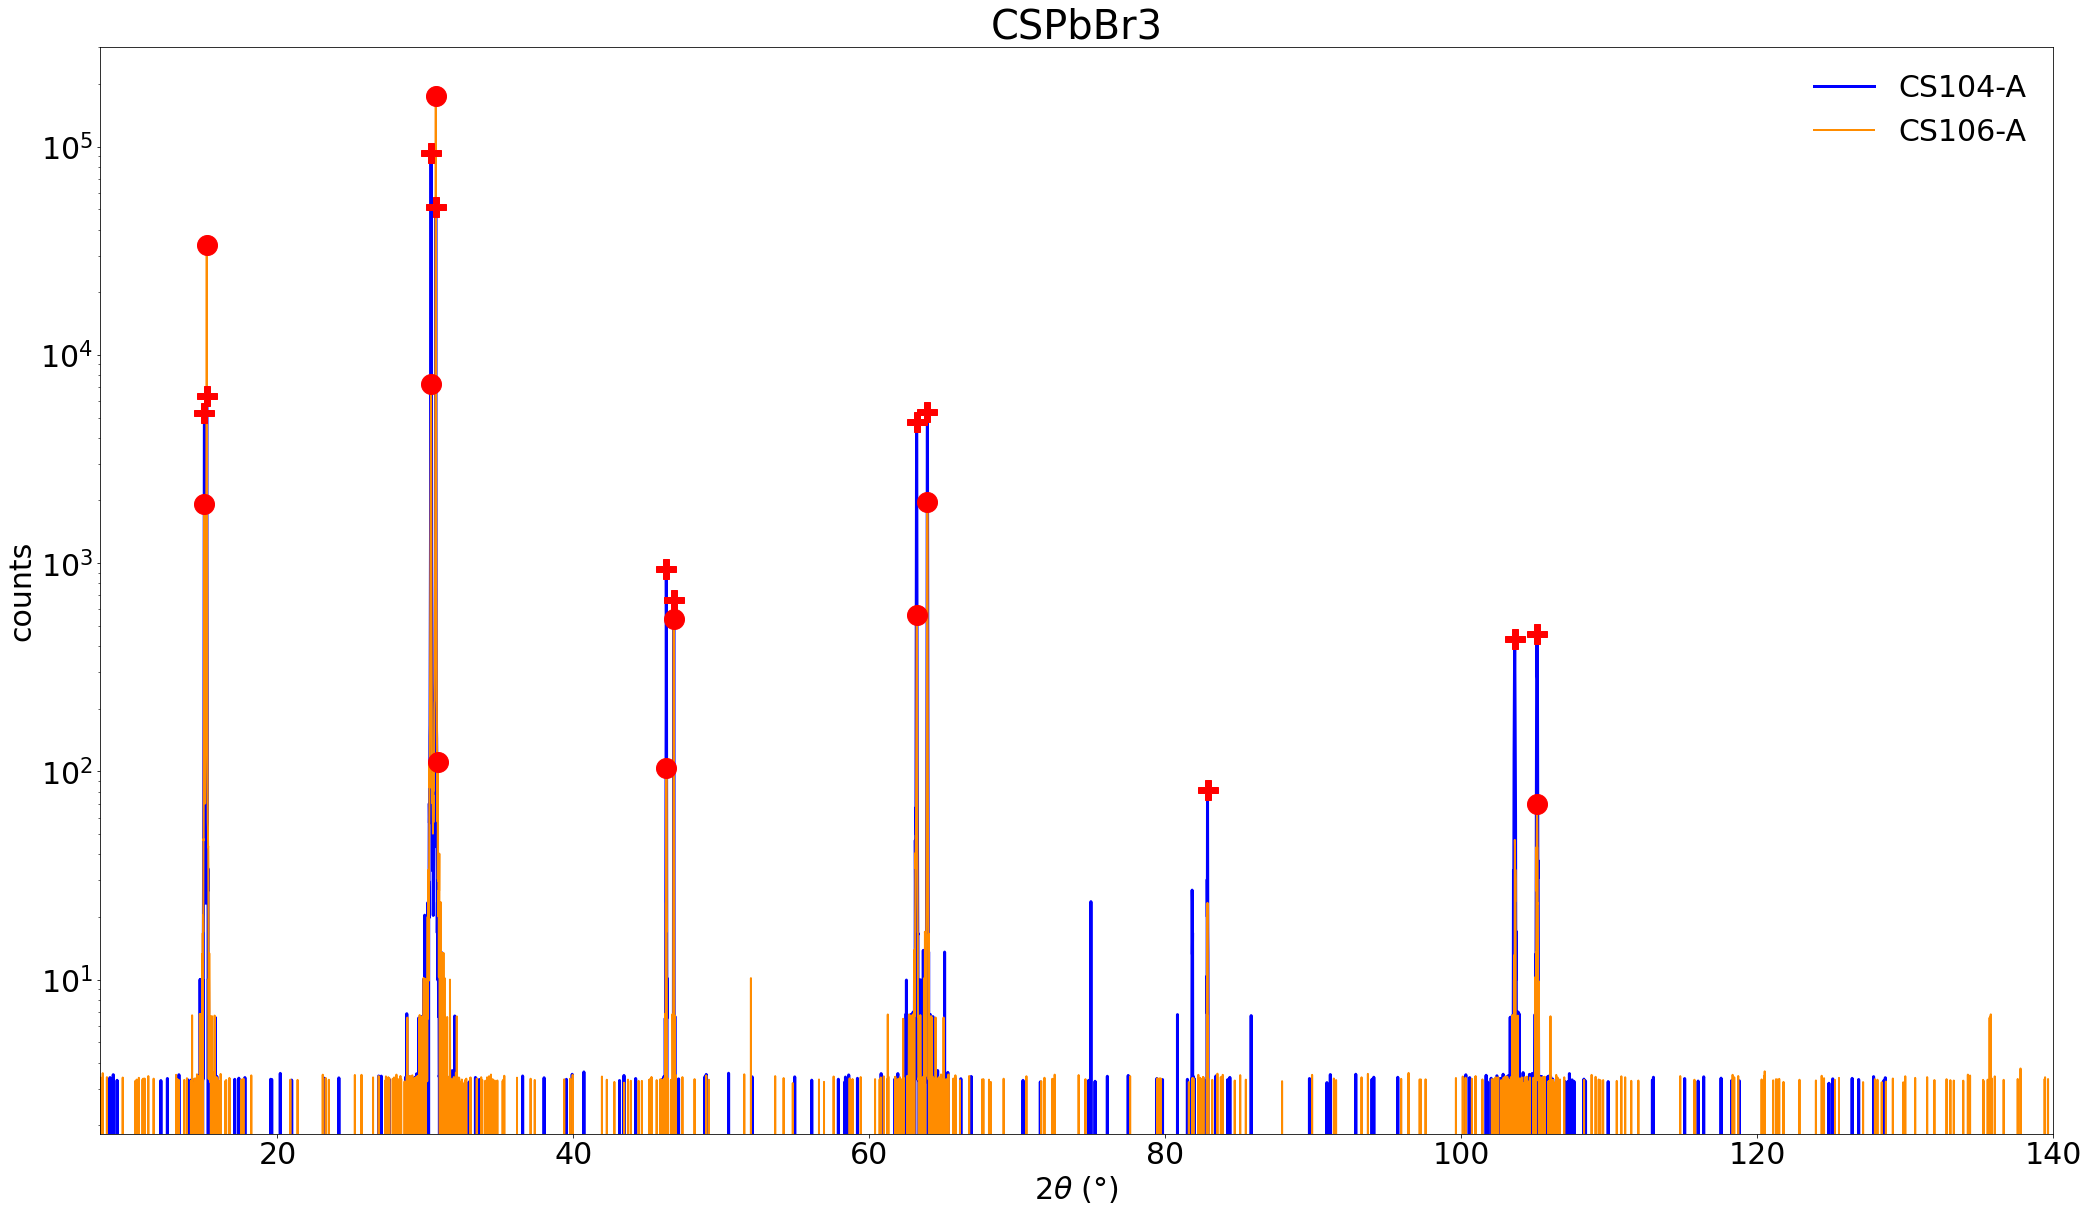

In [19]:
ax = plotXRD(df_CS104_A, df_CS106_A, 'CSPbBr3', 'CS104-A', 'CS106-A', 'b', 'darkorange')

#to draw markers on the peaks:
peaks_x_CS104_A = df_CS104_A['2theta'].iloc[peaks_CS104_A]
peaks_y_CS104_A = df_CS104_A['counts'].iloc[peaks_CS104_A]


peaks_x_CS106_A= df_CS106_A['2theta'].iloc[peaks_CS106_A]
peaks_y_CS106_A = df_CS106_A['counts'].iloc[peaks_CS106_A]

for i, peak in enumerate(peaks_CS104_A):
    ax.plot(peaks_x_CS104_A.iloc[i], peaks_y_CS104_A.iloc[i], 'ro', markersize=20)

for i, peak in enumerate(peaks_CS106_A):
    ax.plot(peaks_x_CS106_A.iloc[i], peaks_y_CS106_A.iloc[i], 'rP', markersize=20)
    


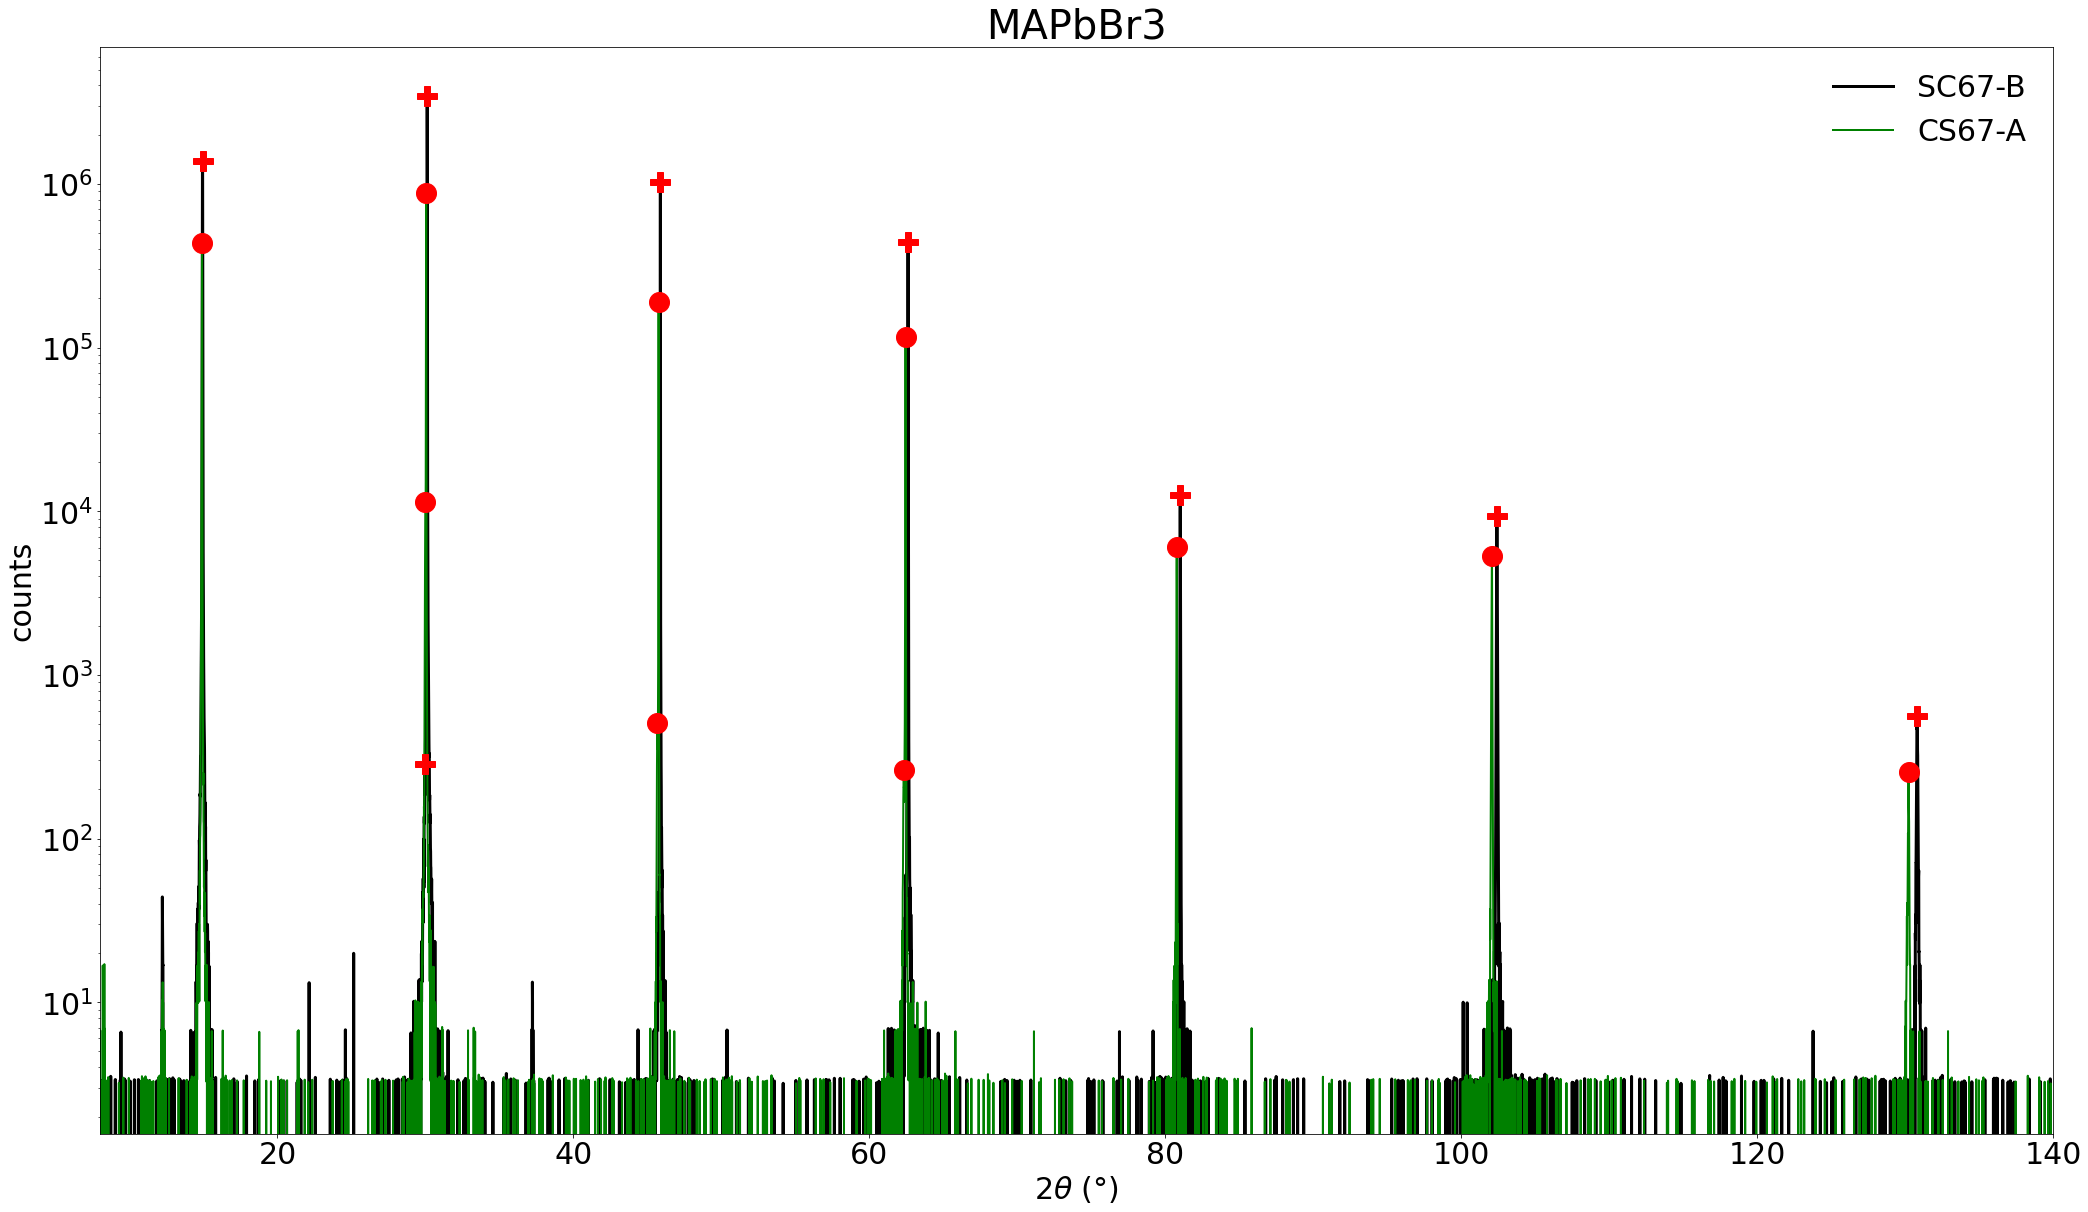

In [20]:
ax = plotXRD(df_SC67_A, df_SC67_B, 'MAPbBr3', 'SC67-B', 'CS67-A', 'black', 'green')

#to draw markers on the peaks:
peaks_x_SC67_A = df_SC67_A['2theta'].iloc[peaks_SC67_A]
peaks_y_SC67_A = df_SC67_A['counts'].iloc[peaks_SC67_A]


peaks_x_SC67_B = df_SC67_B['2theta'].iloc[peaks_SC67_B]
peaks_y_SC67_B = df_SC67_B['counts'].iloc[peaks_SC67_B]

for i, peak in enumerate(peaks_SC67_A):
    ax.plot(peaks_x_SC67_A.iloc[i], peaks_y_SC67_A.iloc[i], 'ro', markersize=20)

for i, peak in enumerate(peaks_SC67_B):
    ax.plot(peaks_x_SC67_B.iloc[i], peaks_y_SC67_B.iloc[i], 'rP', markersize=20)
    


In [ ]:
#draw separate canvas for each peak (to zoom in)

fig, axs = plt.subplots( num_peaks, 1, figsize=(12, num_peaks * 4))
#fig, axs = plt.subplots( 1, num_peaks, figsize=(30,15))

if num_peaks == 1:
    axs = [axs]

for i, peak in enumerate(peaks_SC67_B):
    ax = axs[i]
    window = 200
    start = max(0, peak - window)
    end = min(len(df_SC67_B['2theta']), peak + window)

    ax.set_yscale('log')
    #print(df_SC67_B['counts'][start:end])
    ax.plot(peak_x.iloc[i], peak_y.iloc[i], 'ro')
    ax.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
    ax.set_ylabel("counts", fontsize=30)
    ax.grid(True)
    ax.set_title(f"Peak at Angle {peak_x.iloc[i]}") 
    ax.plot(df_SC67_A['2theta'][start:end], df_SC67_A['counts'][start:end], label='SC67-A', c='green', linewidth=2)
    ax.plot(df_SC67_B['2theta'][start:end], df_SC67_B['counts'][start:end], label='SC67_B', c='black', linewidth=3)
    

#for i_a, peak_a in enumerate(peaks_SC67_A):
#    ax = axs[i_a]
#   print('start', start)
#    print('end', end)
#    print(peak_a)
#    if peak_x_SC67_A.iloc[i_a] in range(start,end) :
#        print('peak', peak_x_SC67_A.iloc[i_a])
#        print('range = [', start, ']', end )
#        ax.plot(peak_x_SC67_A.iloc[i_a], peak_y_SC67_A.iloc[i_a], 'rP')
ax.legend()

#for i, peak in enumerate(peaks_SC67_A):
#    ax = axs[i]
#    ax.plot(peak_x_SC67_A.iloc[i], peak_y_SC67_A.iloc[i], 'rP')
plt.tight_layout()
plt.show()